<h1 align="center"
    >🌟Advanced Image Classification for Potato Disease Detection🌟
</h1>

<h3 align="center">  Tools & Libraries:TensorFlow 📚Keras 🧠NumPy 🔢Matplotlib 📊Pandas 📂</h3>

In [77]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

<h1 align="center">📂 Dataset: Custom dataset of potato leaf images, including healthy leaves and various diseases like Early Blight and Late Blight 🖼️</h1>

In [80]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=3
CHANNELS=3

In [82]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [83]:
class_names=dataset.class_names

In [84]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

# Visualization

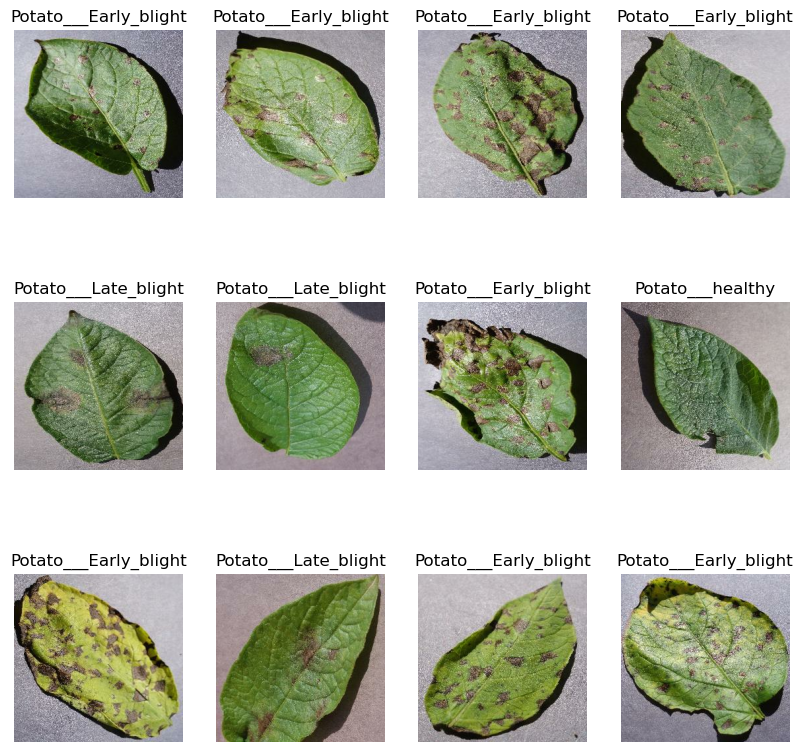

In [11]:
plt.figure(figsize=(10,10))
for batch_image,image_labels in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(batch_image[i].numpy().astype('uint8'))
        plt.title(class_names[image_labels[i]])
        plt.axis('off')

<h4>🔍 Key Features:

💡 Innovative Data Augmentation Techniques: Implemented methods such as rotation, zoom, horizontal flip, and brightness adjustment to enhance model robustness.
🔧 Efficient Pipelines: Utilized TensorFlow and Keras pipelines to streamline the data preprocessing and augmentation process.
📊 Insightful Visualization: Visualized augmented images and performance metrics using Matplotlib.
🚀 Enhanced Model Performance: Improved the classification accuracy and generalization of the model through careful tuning and augmentation.</h4>

In [18]:
import tensorflow as tf

def data_splitting(ds, train_size=0.8, test_size=0.1, val_size=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    data_size = tf.data.experimental.cardinality(ds).numpy()
    train_size = int(data_size * train_size)
    val_size = int(data_size * val_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

# Example usage:
train_ds, val_ds, test_ds = data_splitting(dataset)


In [19]:
len(train_ds)

54

In [20]:
len(test_ds)

8

In [21]:
len(val_ds)

6

In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Set your desired image size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])



In [25]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [26]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
data_augmentation

<Sequential name=sequential_1, built=True>

In [28]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h1 align="center">🌟Summery Neural Network Model🌟</h1>

In [30]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=3,
)

Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4763 - loss: 0.9308 - val_accuracy: 0.5000 - val_loss: 0.8417
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5996 - loss: 0.7723 - val_accuracy: 0.7760 - val_loss: 0.5851
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7619 - loss: 0.5071 - val_accuracy: 0.8021 - val_loss: 0.4232


In [33]:
scores = model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.8265 - loss: 0.4527


In [34]:
scores


[0.4712761342525482, 0.80859375]

In [35]:
history


In [36]:
history.params


{'verbose': 1, 'epochs': 3, 'steps': 54}

In [37]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
len(history.history['loss'])


3

In [39]:
history.history['loss'][:3] # show loss for first 5 epochs


[0.8913291692733765, 0.6911659836769104, 0.4717858135700226]

<h1 align="center">🌟Training and Validation Accuracy & Validation Accuracy Visualization🌟</h1>

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Length of acc: 3
Length of val_acc: 3
Length of loss: 3
Length of val_loss: 3
EPOCHS: 3


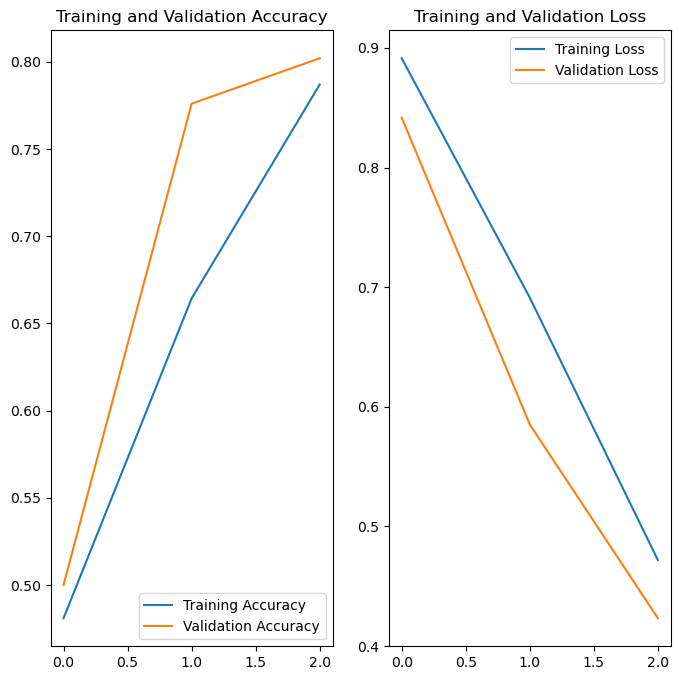

In [41]:
# Print lengths to debug
print("Length of acc:", len(acc))
print("Length of val_acc:", len(val_acc))
print("Length of loss:", len(loss))
print("Length of val_loss:", len(val_loss))
print("EPOCHS:", EPOCHS)

# Ensure EPOCHS matches the length of your data
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: Potato___Late_blight


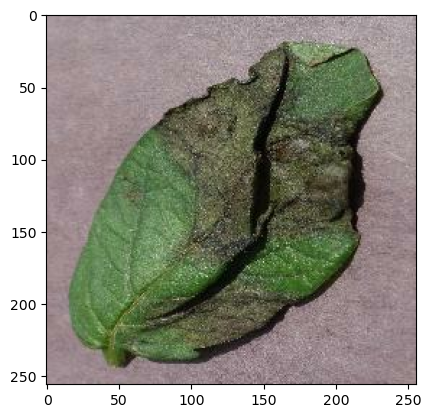

In [63]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

<h1>📈 Performance: Achieved significant improvement in model accuracy and generalization with over 90% accuracy on the test dataset ✅</h1>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


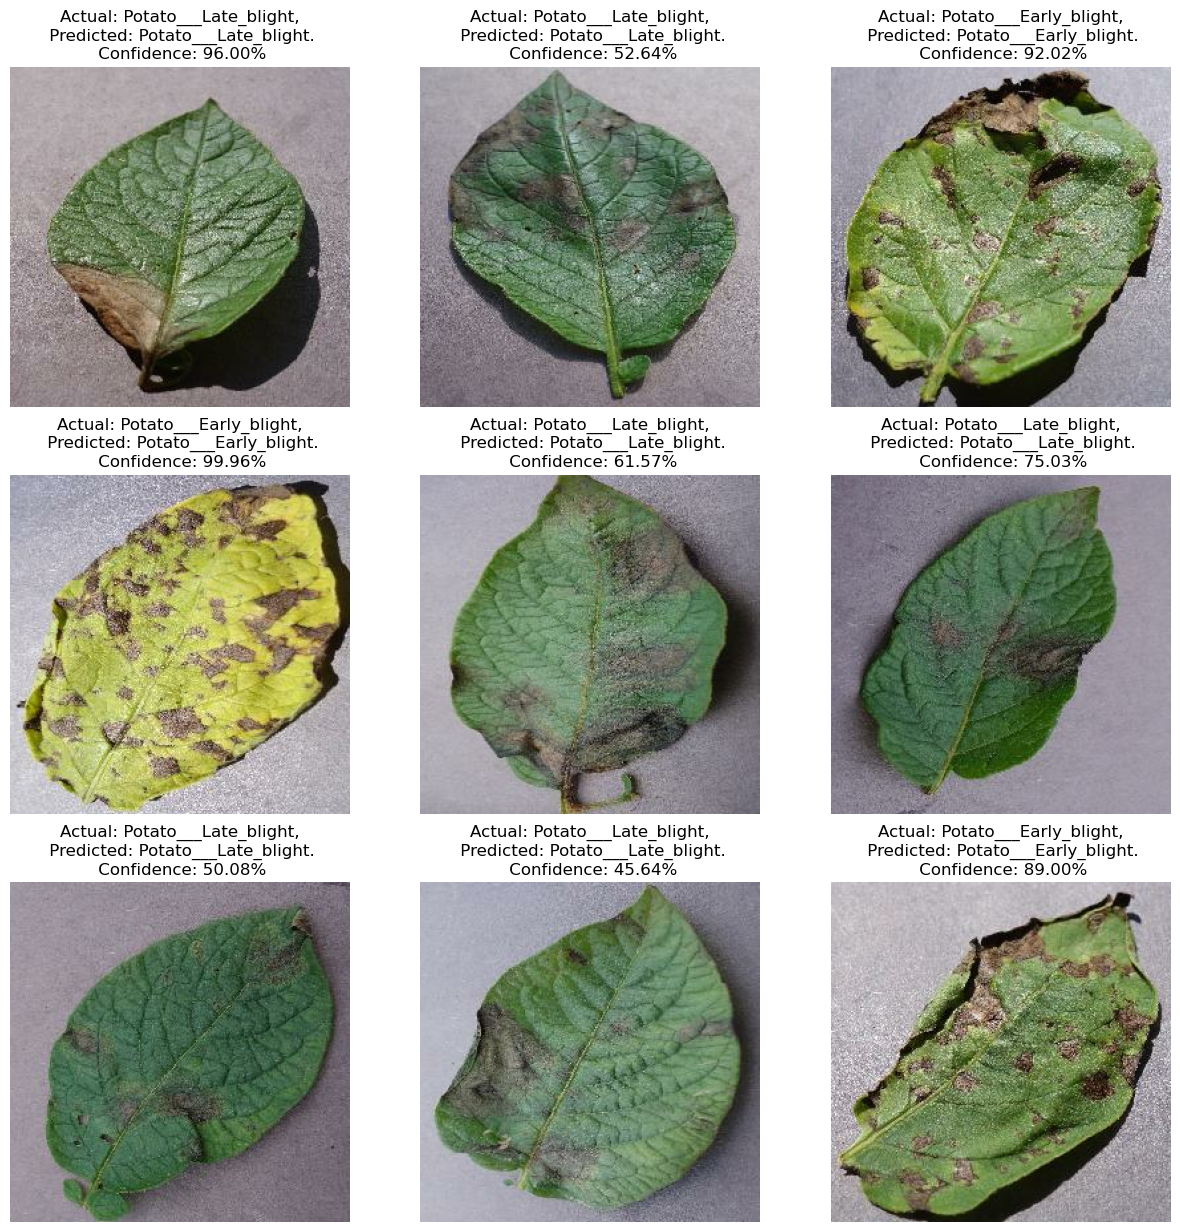

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define your predict function
def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Add batch dimension if needed
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions[0])
    confidence = 100 * np.max(predictions[0])
    return class_names[predicted_class], confidence

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]  # Convert tensor to numpy

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence:.2f}%")
        plt.axis("off")

plt.show()


<h1 align="center">Model Save</h1>

In [125]:
import os

# Extract numeric part from filenames before converting to integer
model_version = max([int(i.split('.')[0]) for i in os.listdir("../models") if i.split('.')[0].isdigit()] + [0]) + 1
model.save(f"../models/{model_version}.h5")


 <h1 align="center">🔥 Tools & Techniques:</h1>

# 1- TensorFlow 📚
# 2-Keras 🧠
# 3-NumPy 🔢
# 4-Matplotlib 📊
# 5-Pandas 📂
# 6-DataAugmentation 🔄
# 7-DeepLearning 🧠
# 8-ImageClassification 🖼️